# Imports

In [1]:
#!pip install fastcluster

In [2]:
import gzip
import pickle
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../../src/")
from convertor import convert
from preprocessing import get_target, preprocessing
from numpy.linalg import norm

KeyboardInterrupt: 

In [2]:
plant_list = [
    "A.thaliana",
    "C.sinensis",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "O.sativa",
    "S.bicolor",
    "T.aestivum",
    "Z.mays"
]

## load datasets

In [5]:
!pwd

/home/jupyter/Ilia/amir-p3/jupyter_ipynbs/correlation_and_similarity


In [7]:
for plant in plant_list:    
    !cp ../../experiment/{plant}/positive/Result/result_level1_filter.csv  ../../../Temp/{plant}_positive_result_level1_filter.csv
    !cp ../../experiment/{plant}/negative/Result/result_level1_filter.csv  ../../../Temp/{plant}_negative_result_level1_filter.csv

In [4]:
data = []
for plant in plant_list:
    pos = pd.read_csv(f'../../experiment/{plant}/positive/Result/result_level1_filter.csv')
    data.append(pos)                
    neg = pd.read_csv(f'../../experiment/{plant}/negative/Result/result_level1_filter.csv')
    data.append(neg)
    
    
data = pd.concat(data)
data.shape

(62007, 183)

## preprocess

In [5]:
data = convert(data)
[features, mu, std]  = preprocessing(data, None, None, True)

/home/jupyter/Ilia/amir-p3/jupyter_ipynbs/correlation_and_similarity/../../src/preprocessing.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c].replace([np.inf], m, inplace=True)


In [6]:
corr_matrix = features.corr()

## bi-clustering and show function

In [7]:
def bi_cluster_sort_arg(corr):
    inp = corr.copy()
    clustergrid = sns.clustermap(inp, cmap='coolwarm', row_cluster=True, col_cluster=True, figsize=(0.01, 0.01), dendrogram_ratio=(0.1, 0.1), cbar_pos=None)
    return clustergrid.dendrogram_row.reordered_ind

In [9]:
def show_heatmap(corr, title='Correlation Heatmap', yticklabels=False, savefig=False):
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr,
                cmap='coolwarm',
                annot=False,
                cbar=True,
                fmt=".2f",
                linewidths=0,
                linecolor='black',
                square=False,
                xticklabels=False,
                yticklabels=yticklabels,
                mask=None,
                ax=None,
                center=None,
                vmin=-1,
                vmax=1,
                annot_kws=None,
                cbar_kws=None)

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    if savefig:
        plt.savefig(f"./heat_map_corrolation_figs/{title}.svg")

## call and generate heat maps

### not clustered

#### all datasets

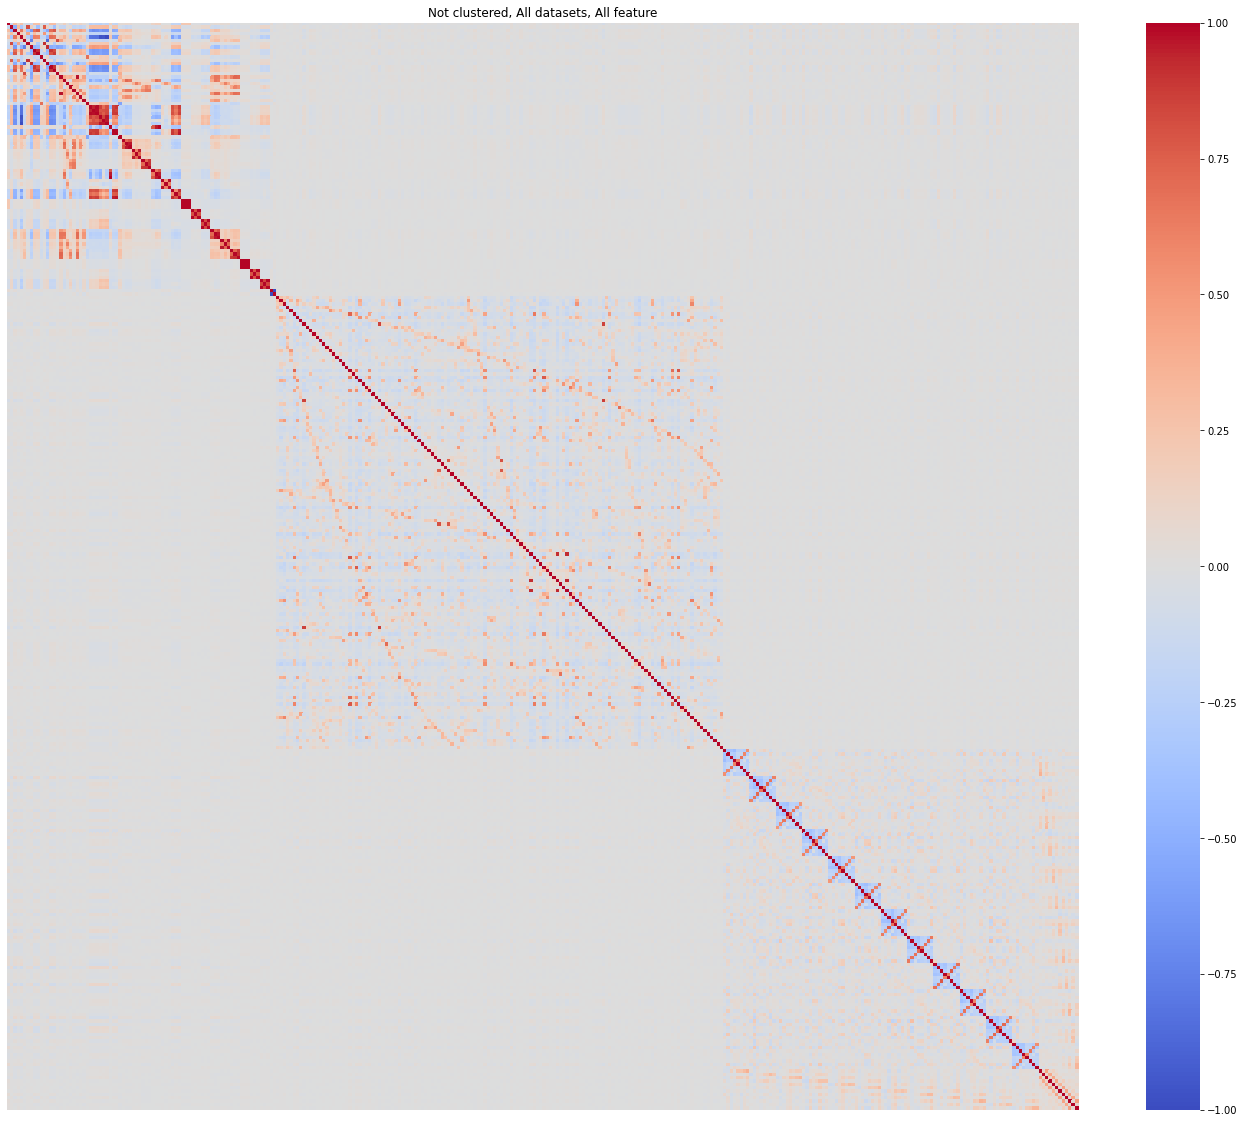

In [10]:
show_heatmap(corr_matrix,title="Not clustered, All datasets, All feature", yticklabels=False, savefig=False)

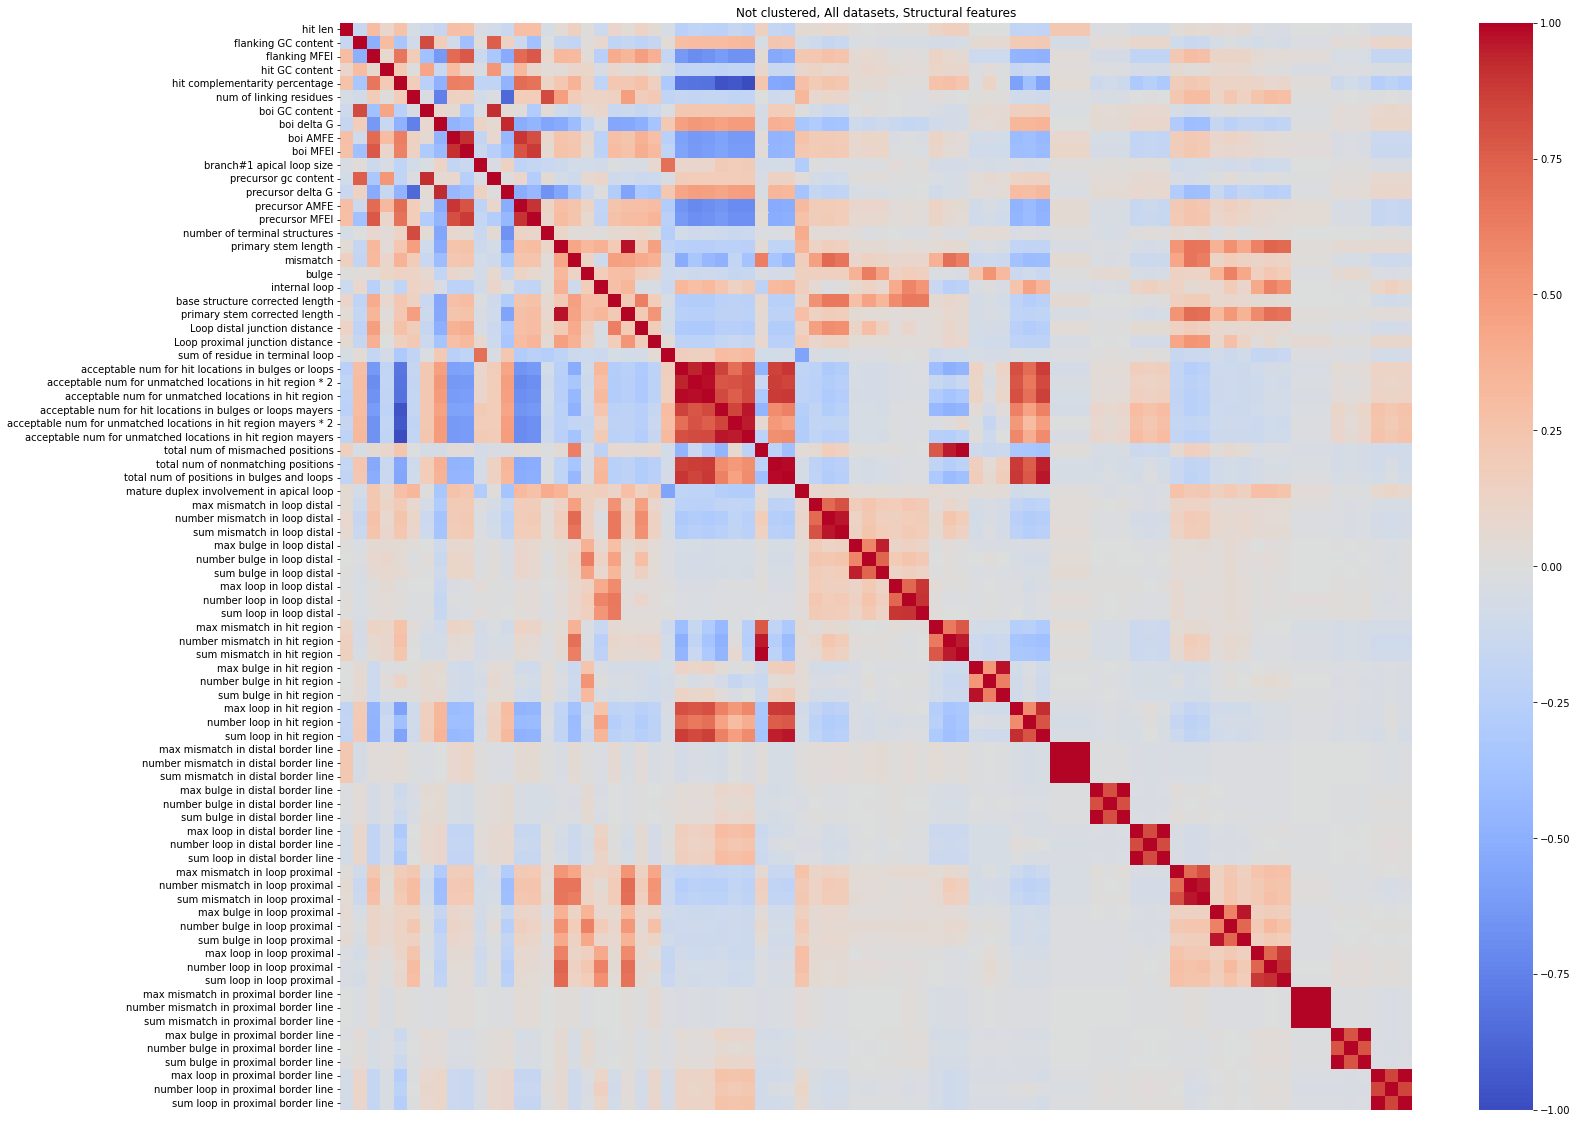

In [11]:
show_heatmap(corr_matrix.iloc[0:80,0:80], "Not clustered, All datasets, Structural features", yticklabels=True, savefig=False)

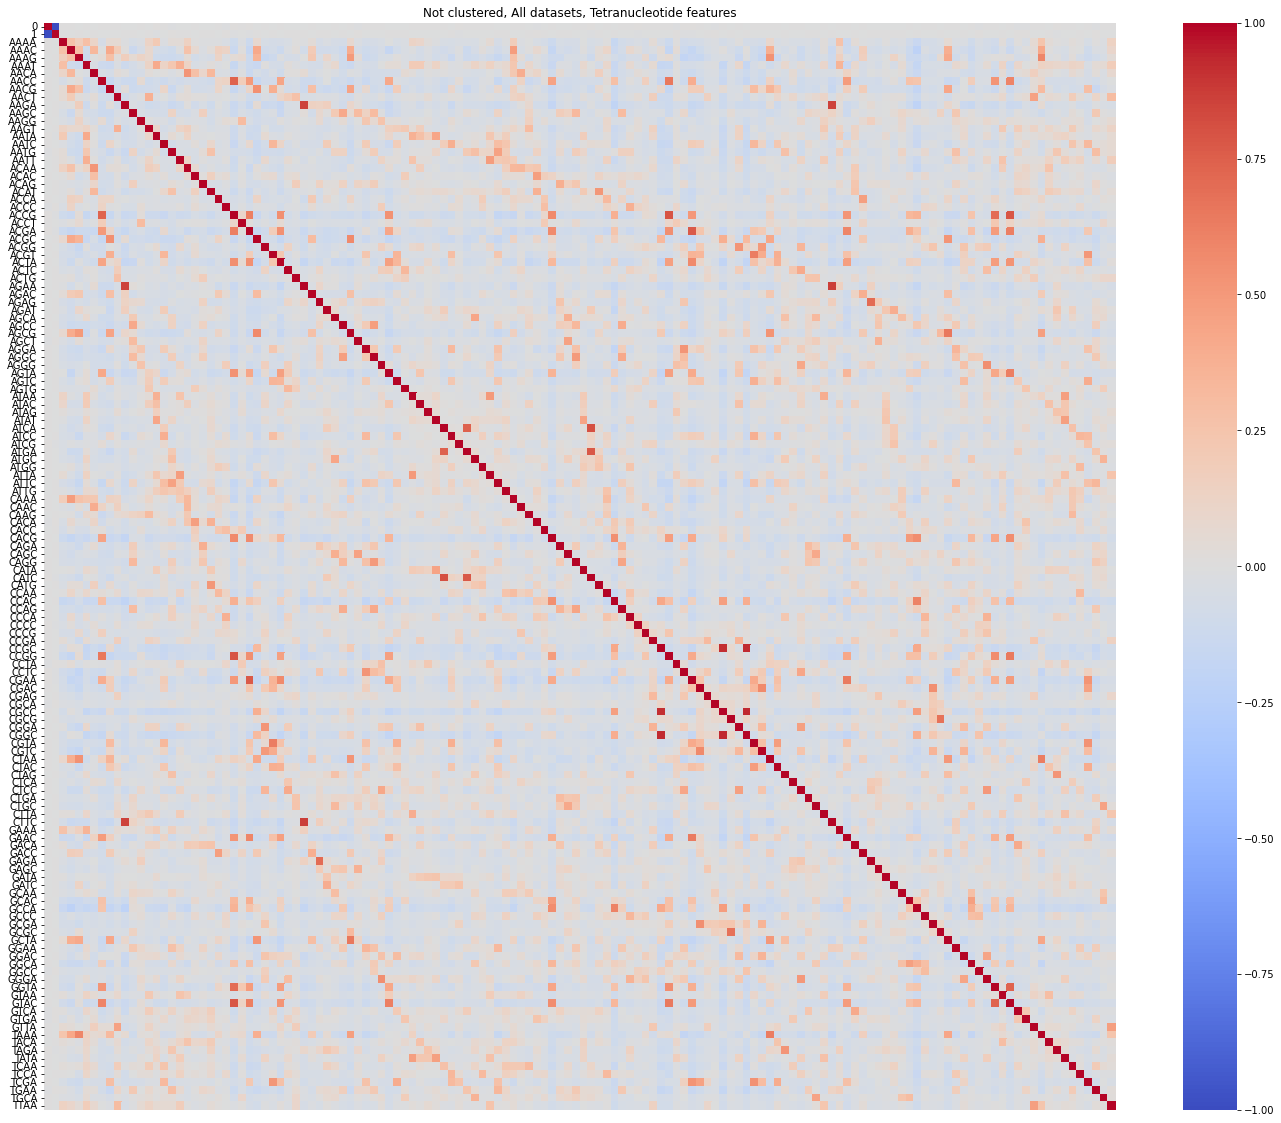

In [12]:
show_heatmap(corr_matrix.iloc[80:218,80:218], "Not clustered, All datasets, Tetranucleotide features", yticklabels=True, savefig=False)

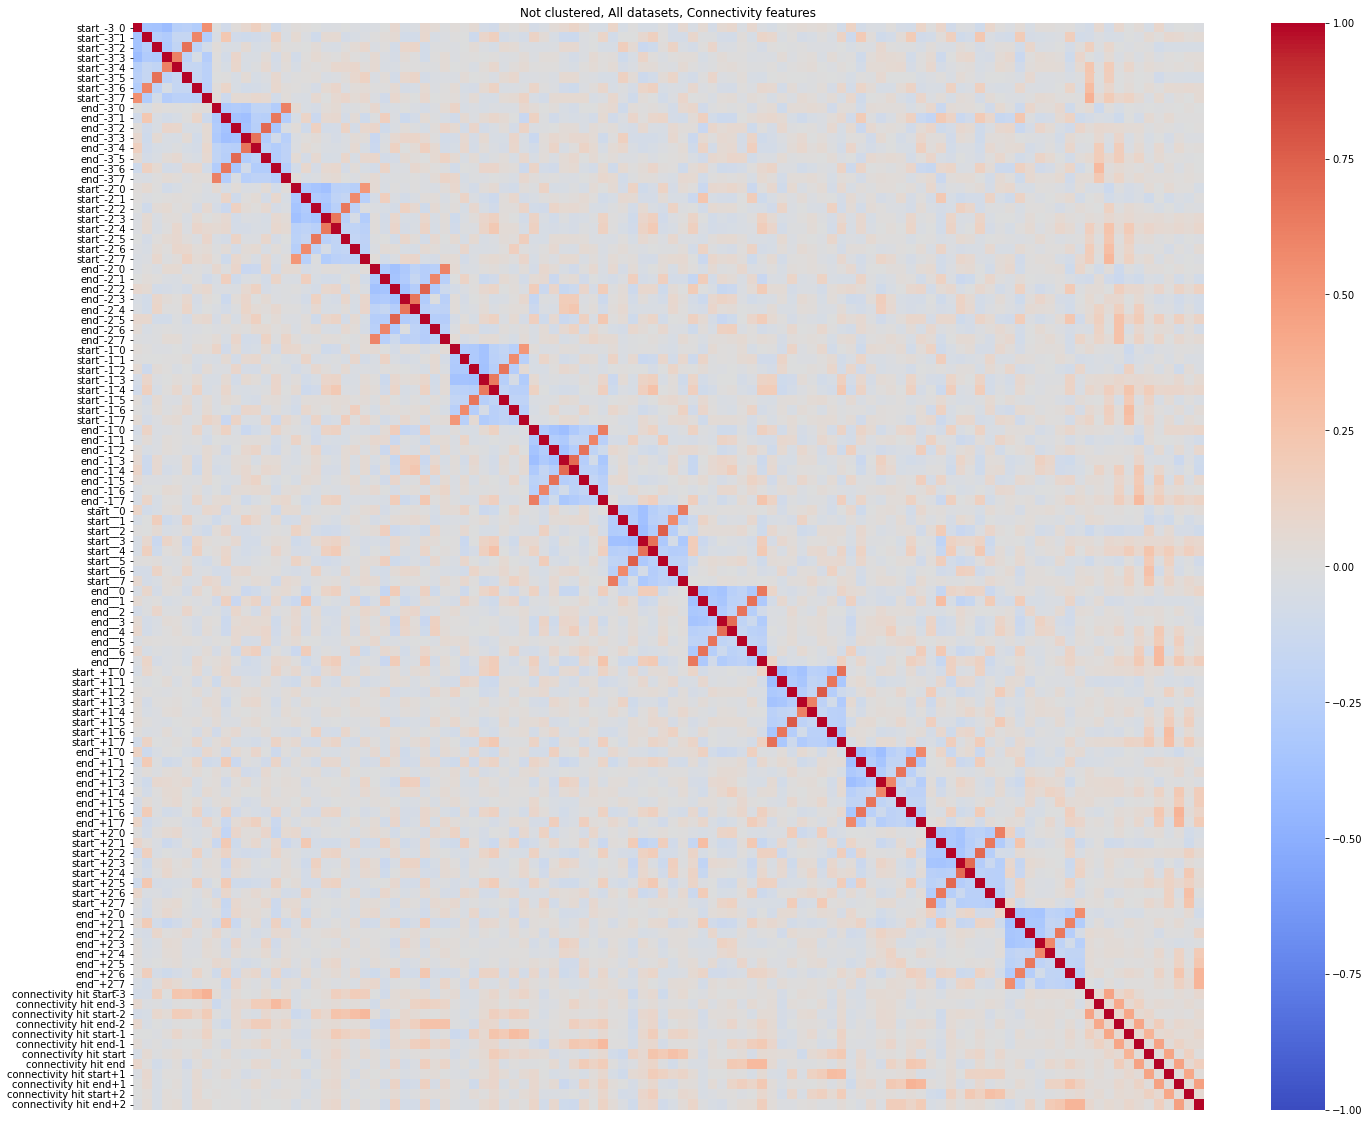

In [13]:
show_heatmap(corr_matrix.iloc[218:,218:], "Not clustered, All datasets, Connectivity features", yticklabels=True, savefig=False)

### bi-clusterd

/home/emadi/.local/lib/python3.8/site-packages/seaborn/matrix.py:1107: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(**tight_params)


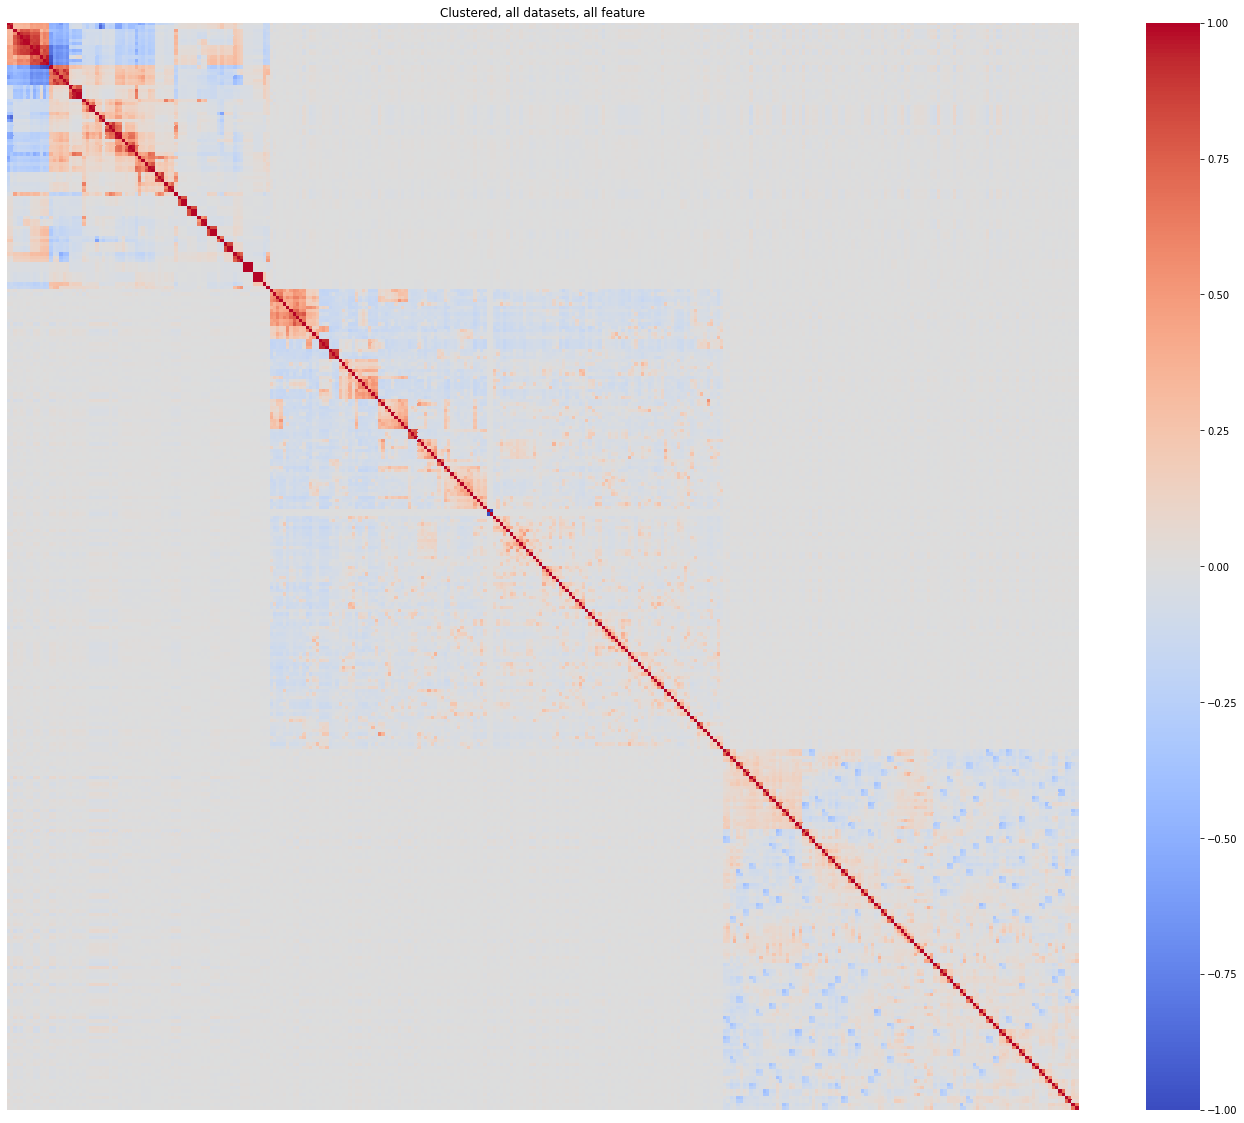

In [14]:
clusterd_corr = corr_matrix.copy()
# area 1
index_area1 = bi_cluster_sort_arg(clusterd_corr.iloc[0:80,0:80])
clusterd_corr.iloc[0:80,0:80] = clusterd_corr.iloc[index_area1,0:80]
clusterd_corr.iloc[0:80,0:80] = clusterd_corr.iloc[0:80,index_area1]

# area 2
index_area2 = bi_cluster_sort_arg(clusterd_corr.iloc[80:218,80:218])
index_area2 = [i + 80 for i in index_area2]
clusterd_corr.iloc[80:218,80:218] = clusterd_corr.iloc[index_area2, 80:218]
clusterd_corr.iloc[80:218,80:218] = clusterd_corr.iloc[80:218, index_area2]

# area 3
index_area3 = bi_cluster_sort_arg(clusterd_corr.iloc[218:,218:])
index_area3 = [i + 218 for i in index_area3]
clusterd_corr.iloc[218:, 218:] = clusterd_corr.iloc[index_area3, 218:]
clusterd_corr.iloc[218:, 218:] = clusterd_corr.iloc[218:, index_area3]
show_heatmap(clusterd_corr, title="Clustered, all datasets, all feature", yticklabels=False, savefig=True)

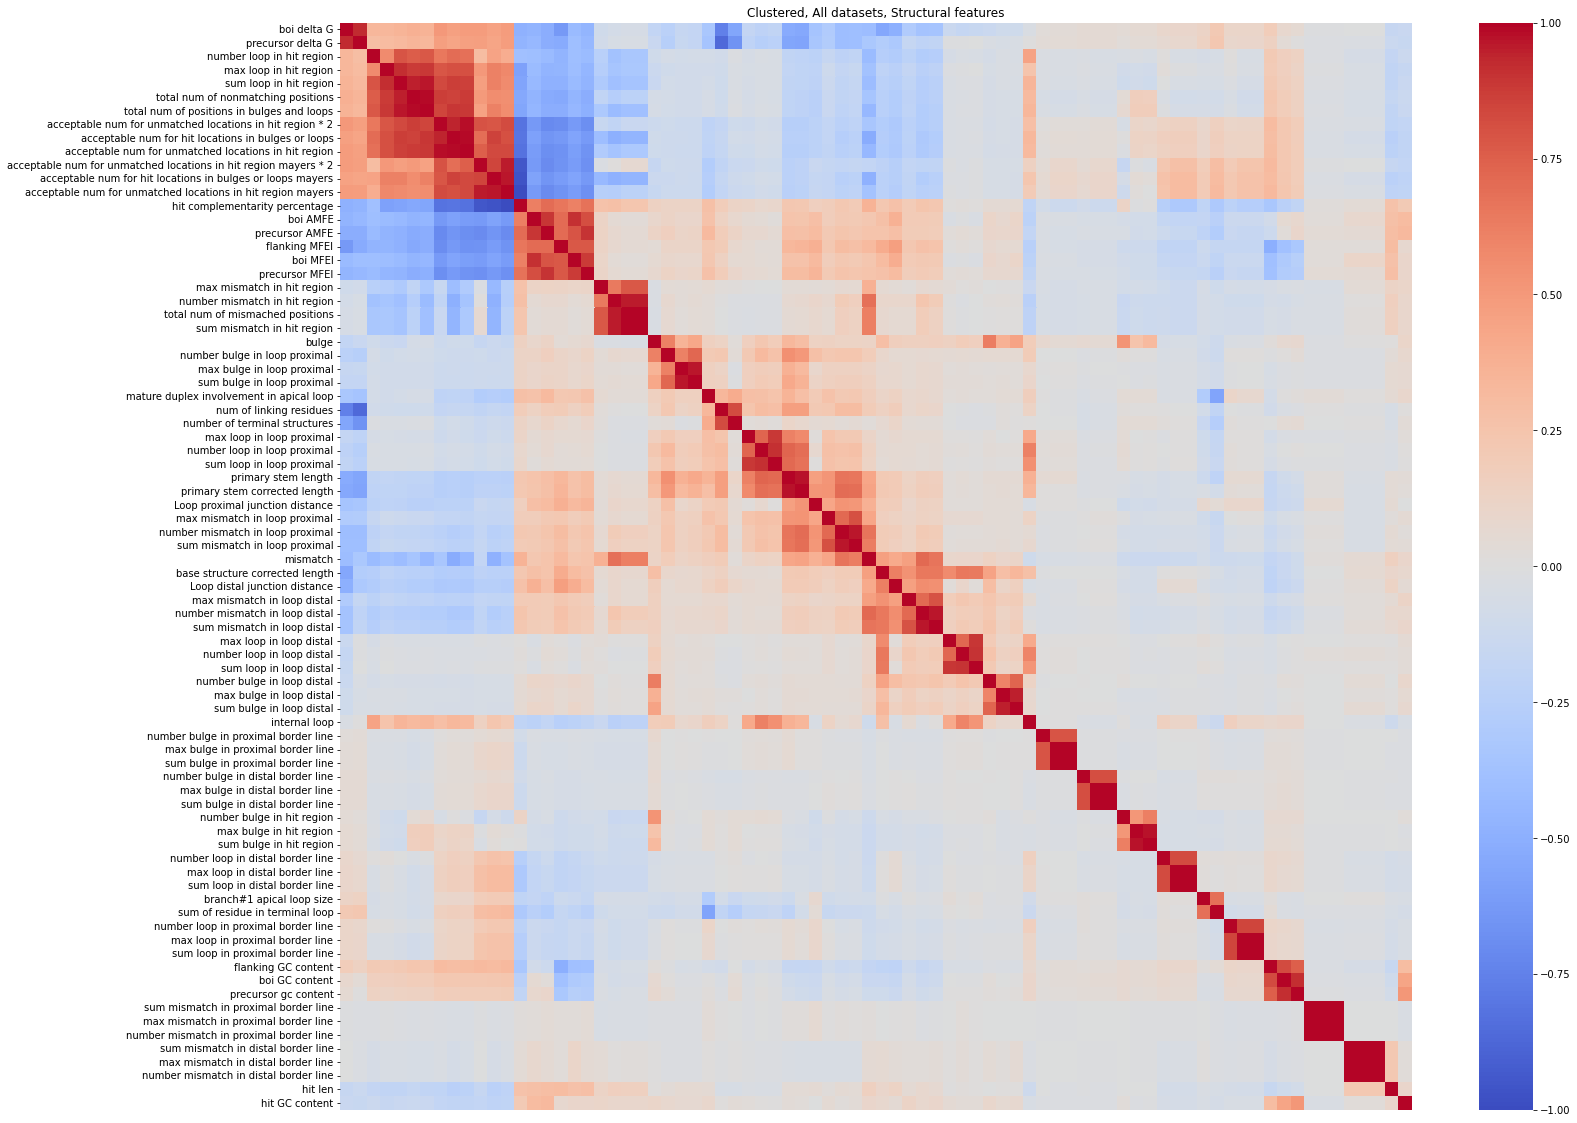

In [16]:
temp = corr_matrix.iloc[0:80,0:80].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Structural features", yticklabels=True, savefig=True)

/home/emadi/.local/lib/python3.8/site-packages/seaborn/matrix.py:1107: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self._figure.tight_layout(**tight_params)


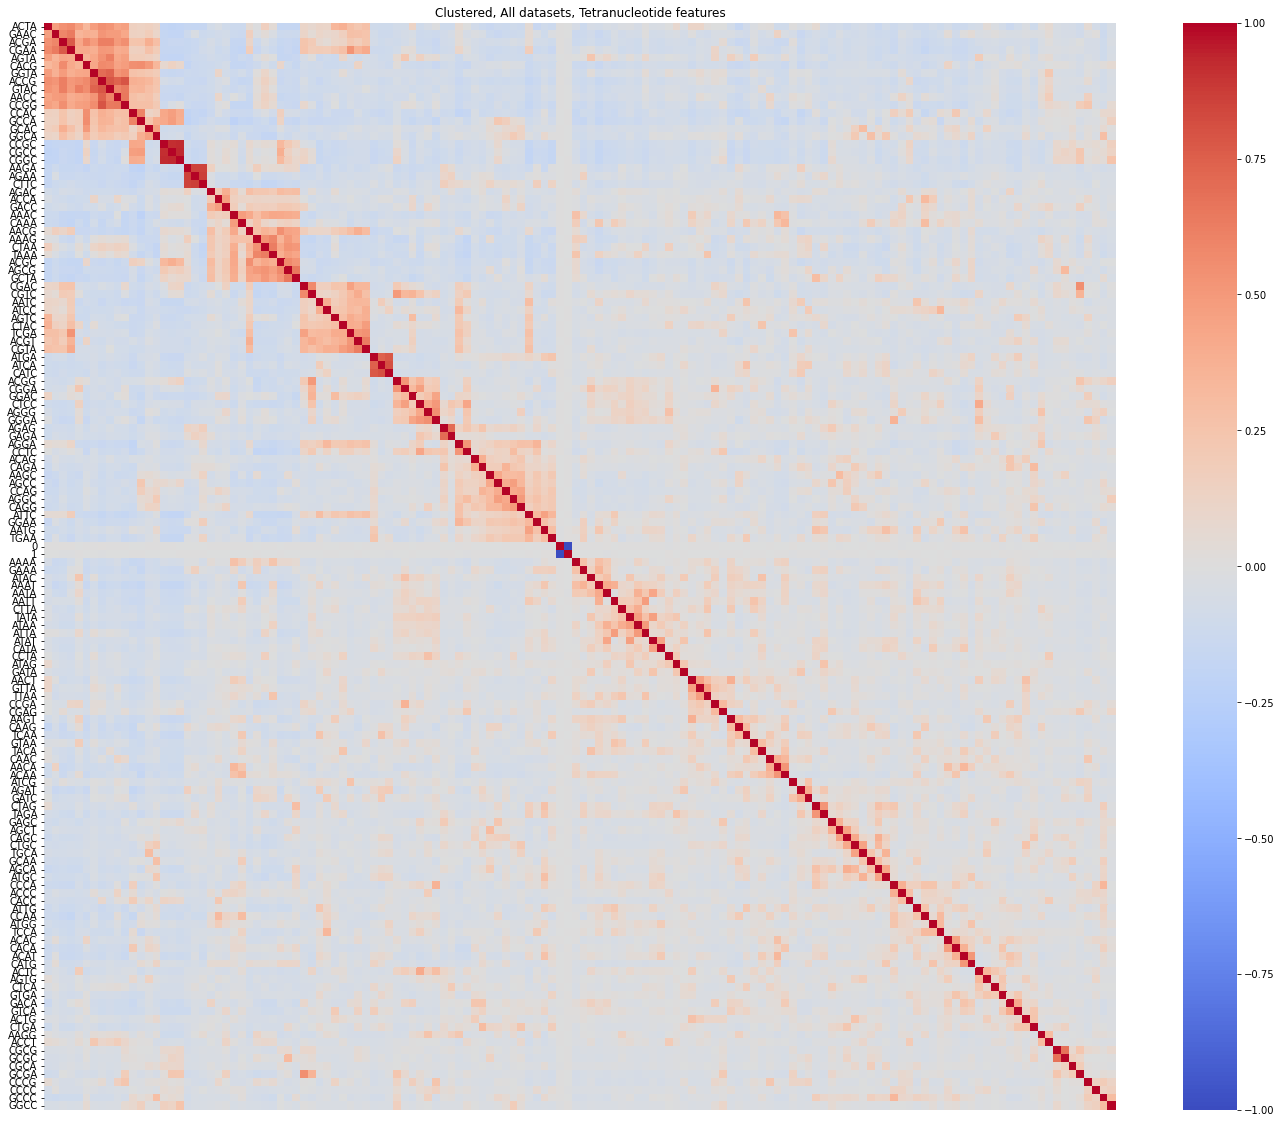

In [24]:
temp = corr_matrix.iloc[80:218,80:218].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Tetranucleotide features", yticklabels=True, savefig=True)

In [28]:
s = list(temp.columns)
print('\n'.join([str(i + 81) + ": " + s[i] for i in range(len(s))]))

TypeError: can only concatenate str (not "int") to str

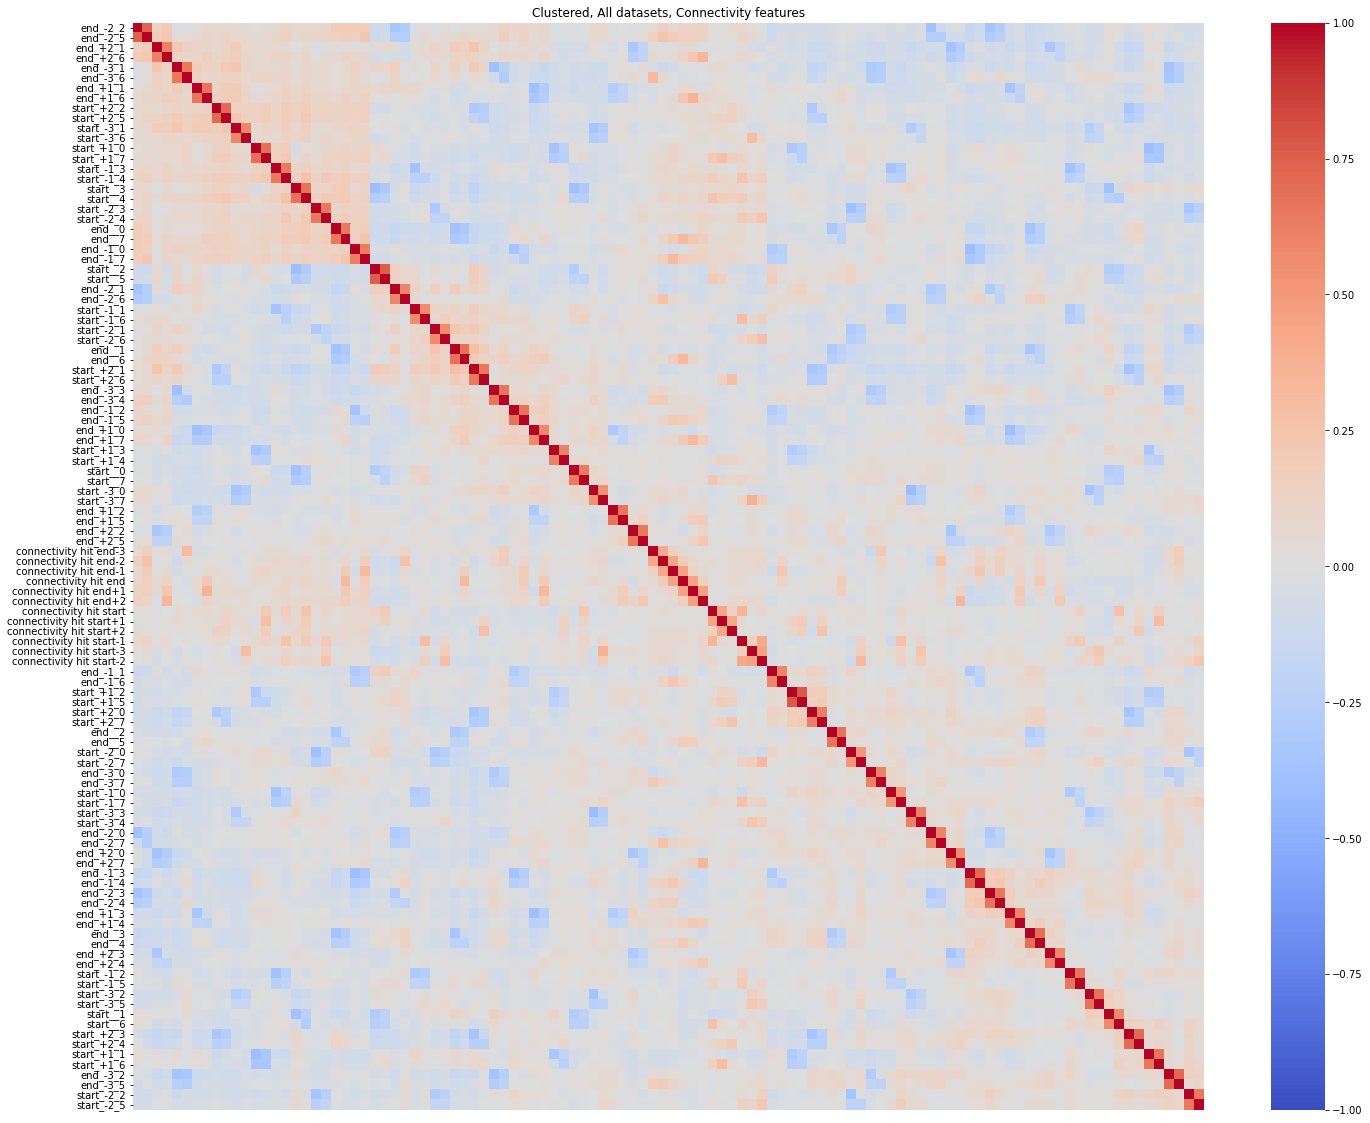

In [60]:
temp = corr_matrix.iloc[218:,218:].copy()
index = bi_cluster_sort_arg(temp)
temp = temp.iloc[index,:]
temp = temp.iloc[:, index]
show_heatmap(temp, "Clustered, All datasets, Connectivity features", yticklabels=True, savefig=True)